In [1]:
from SynthPop import Copula

import numpy as np
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

%matplotlib inline

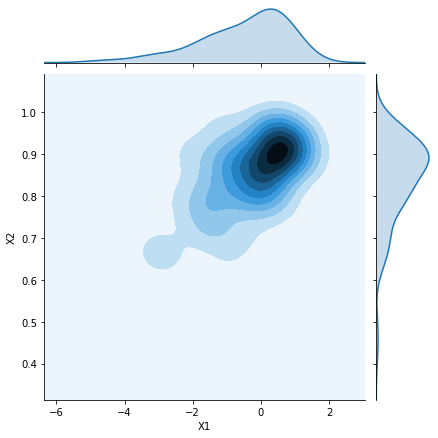

In [2]:
# original dataset that we wish to replicate since there are only 100 samples

data = np.load("data.npy")
h = sns.jointplot(data[0], data[1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2')

## Establishing a Baseline
we establish a baseline by fitting and scoring a model on groundtruth data.

In [43]:
x1, x2 = data[0], data[1]
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=0.5)

In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)
print("rsme: ", metrics.mean_squared_error(y_test, pred))

rsme:  0.004118138109165328


## Using Synthetic Data
We repeat the previous step with synthetic data.

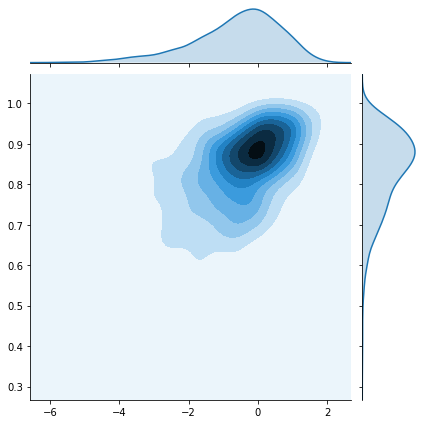

In [54]:
Generator = Copula()
Generator.fit(data)
x1, x2 = Generator.sample(k=1000)  # generate synthetic samples
sns.jointplot(x1, x2, kind='kde', stat_func=None);

In [55]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)

In [56]:
model = lm.fit(x1, x2)
pred = lm.predict(X_test)
metrics.mean_squared_error(y_test, pred)  # smaller rsme loss

0.003694287832783744